In [160]:
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

boston = fetch_california_housing() 



df = pd.DataFrame(data=StandardScaler().fit_transform(boston.data), columns=boston.feature_names)
###df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['target'] = boston.target
df.head()
#df.mean()
#dfnew=StandardScaler().fit_transform(df)
#df=pd.DataFrame(dfnew,columns=df.columns, index=list(df.index.values))
#df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


In [161]:
'''
corr_mattrix=df.corr()
corr_mattrix['target'].sort_values()
'''

"\ncorr_mattrix=df.corr()\ncorr_mattrix['target'].sort_values()\n"

In [162]:
#corr_mattrix

In [163]:
'''
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(corr_mattrix, annot=True, cmap=cmap)
plt.show()
'''

'\ncmap = sns.light_palette("darkgray", as_cmap=True)\nsns.heatmap(corr_mattrix, annot=True, cmap=cmap)\nplt.show()\n'

In [164]:
'''
df=df.drop(columns=['AveBedrms','Longitude'])
df
'''

"\ndf=df.drop(columns=['AveBedrms','Longitude'])\ndf\n"

In [165]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [166]:
'''
x_data=df.iloc[:,:-1]
y_data=df.iloc[:,[-1]]

sns.pairplot(df)
plt.show()'''

'\nx_data=df.iloc[:,:-1]\ny_data=df.iloc[:,[-1]]\n\nsns.pairplot(df)\nplt.show()'

In [167]:
X=np.array(df.drop(['target'],axis=1))
Y=np.array(df['target'])
X_tr, X_tst, Y_tr, Y_tst=train_test_split(X,Y,test_size=0.3)
X_tr, X_tst, Y_tr, Y_tst=map(lambda x: np.array(x), [X_tr, X_tst, Y_tr, Y_tst])
X_tst.shape,Y_tst.shape

((6192, 8), (6192,))

In [168]:


def costfuction(y,yhat):
    return np.square(y-yhat)/y.shape
def yhat(X,w,b):
    return np.dot(X,w)+b

   ### return np.add(np.dot(X, w),b)
W=np.ones(X_tr.shape[1])
b=np.ones(X_tr.shape[0])
def wgrad(X,Y,w,b):
    return np.dot(np.subtract(yhat(X,w,b),Y),X)/X.shape[0]
def bgrad(X,Y,w,b):
    return np.sum(np.subtract(yhat(X,w,b),Y))/X.shape[0]

wgrad(X_tr,Y_tr,W,b),yhat(X_tr,W,b),b.shape


(array([0.25838995, 0.15697038, 2.06469537, 2.01636222, 0.67702   ,
        0.47639713, 0.2366867 , 0.09484311]),
 array([-1.58260166, -1.85120197,  0.56258576, ..., -0.08705898,
         1.4345125 ,  1.05727375]),
 (14448,))

In [169]:
def plot_prediction(pred,y):
    
    plt.scatter(pred,y,color='b')
    

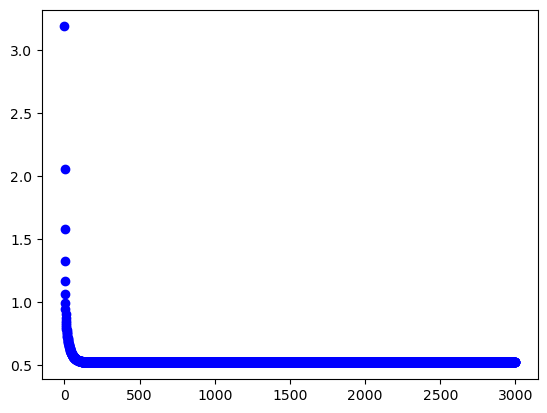

In [170]:
learningrate=0.3
for epoch in range(3000):
    
    W=W-learningrate*wgrad(X_tr,Y_tr,W,b)
    b=b-learningrate*bgrad(X_tr,Y_tr,W,b)
    
    plot_prediction(epoch,np.sum(costfuction(Y_tr,yhat(X_tr,W,b))))
plt.show()

In [171]:
costfuction(Y_tr,yhat(X_tr,W,b)),W,b

(array([2.11540910e-06, 9.99327802e-07, 1.35779478e-05, ...,
        5.49839037e-06, 3.11002615e-05, 2.01830443e-05]),
 array([ 0.81699026,  0.12373993, -0.24000368,  0.28100698, -0.00228325,
        -0.04549479, -0.89926628, -0.86989603]),
 array([2.06910133, 2.06910133, 2.06910133, ..., 2.06910133, 2.06910133,
        2.06910133]))

In [172]:
def Worigin(X,Y):
    b_0=np.ones((X.shape[0],1))
    print(b_0.shape)
    newX=np.hstack([X,b_0])
    inv=np.linalg.inv(np.dot(np.transpose(newX),newX))
    worigin=np.dot(np.dot(inv,newX.transpose()),Y)
    return worigin
newb=Worigin(X_tr,Y_tr)[-1]
worigin=Worigin(X_tr,Y_tr)[:-1]
newb, worigin

(14448, 1)
(14448, 1)


(2.0691013313766264,
 array([ 0.81699026,  0.12373993, -0.24000368,  0.28100698, -0.00228325,
        -0.04549479, -0.89926628, -0.86989603]))

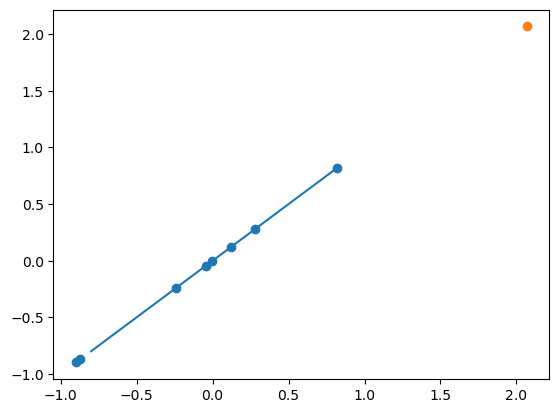

In [173]:
plt.scatter(W,worigin)
plt.scatter(b[0],newb)
plt.plot([-0.8,0,0.8],[-0.8,0,0.8])
plt.show()

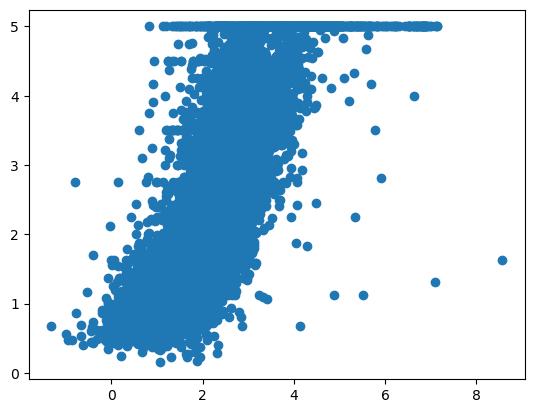

In [174]:
plt.scatter(yhat(X_tr,W,b),Y_tr)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

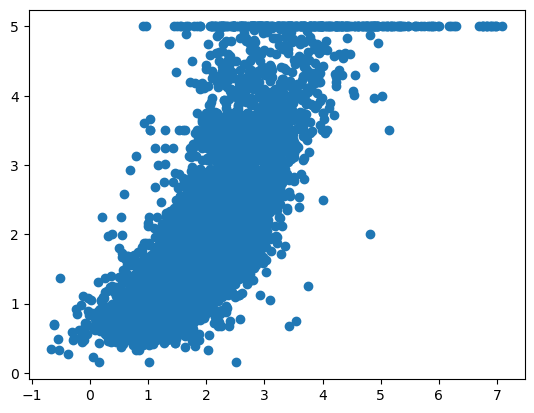

In [175]:

tstb=np.full((X_tst.shape[0],),b[0])
Y_tsthat=yhat(X_tst,W,tstb)
plt.scatter(Y_tsthat,Y_tst)
plt.show

In [176]:
corr_mattrix=df.corr()
corr_mattrix['target'].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
target        1.000000
Name: target, dtype: float64

In [177]:
corr_mattrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


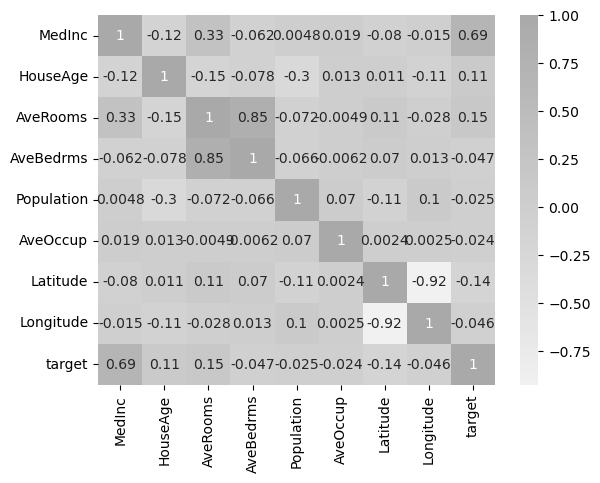

In [178]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(corr_mattrix, annot=True, cmap=cmap)
plt.show()

AveBedrms 과 AveRooms의 공분산 0.85

Longitude 과 Latitude의 공분산 -0.92

평균 침실과 평균 룸수는 비례하므로 침실을 제거

경도와 위도는 캘리포니아가 y=-x의 꼴이기때문에 서로 연관이있다고 보기때문에 target값과 상관관게가 작은 longitude를 제거


array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='target', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='HouseAg

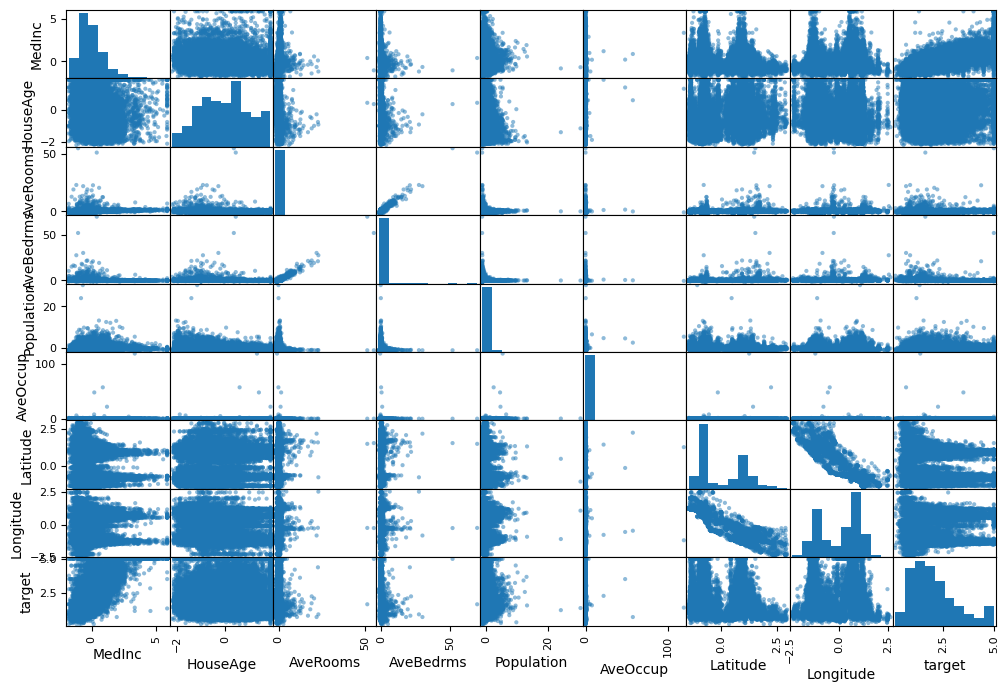

In [179]:
from pandas.plotting import scatter_matrix
df.columns
scatter_matrix(df[df.columns],figsize=(12,8))

In [180]:
from sklearn.metrics import r2_score
r2_score(Y_tsthat,Y_tst), r2_score(yhat(X_tr,W,b),Y_tr)

(0.32339440788692997, 0.35324409934805223)

In [181]:
'''
df_=df.drop(columns=['AveBedrms','Longitude'])
df_
'''
#다시 코드위쪽으로 대입

"\ndf_=df.drop(columns=['AveBedrms','Longitude'])\ndf_\n"

In [183]:
from sklearn.linear_model import LinearRegression


lr=LinearRegression()
lr.fit(X_tr,Y_tr)
lr.score(X_tr,Y_tr),lr.coef_,lr.intercept_,W,b

(0.6072545418565689,
 array([ 0.81699026,  0.12373993, -0.24000368,  0.28100698, -0.00228325,
        -0.04549479, -0.89926628, -0.86989603]),
 2.069101331376628,
 array([ 0.81699026,  0.12373993, -0.24000368,  0.28100698, -0.00228325,
        -0.04549479, -0.89926628, -0.86989603]),
 array([2.06910133, 2.06910133, 2.06910133, ..., 2.06910133, 2.06910133,
        2.06910133]))